<a href="https://colab.research.google.com/github/Jiya-786/Statistics_notes/blob/main/TUT/TUT-3/Kaggle_assignment_E_commerce_performance_analysis_%E2%80%93_Pandas%2C_NumPy%2C_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vivek468_superstore_dataset_final_path = kagglehub.dataset_download('vivek468/superstore-dataset-final')

print('Data source import complete.')


Using Colab cache for faster access to the 'superstore-dataset-final' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [ ]:
#                            PART A
# 🎯 Goal: Just look at the dataset and understand
#           what’s inside.

df = pd.read_csv(
    '/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',
    encoding='latin1'
)




In [ ]:
# displaying first 5 rows-
print("First 5 rows-")
display(df.head())

# displaying last 5 rows-
print("Last 5 rows-\n")
display(df.tail())


First 5 rows-


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Last 5 rows-



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
# show all column names
print("Show all column names-")
display(df.columns)

# show data types of all columns
print("Show data types of all columns-")
display(df.dtypes)

# show no.of empty/missing values in every column
print("No.of empty entries in each column-\n")
print(df.isnull().sum())



Show all column names-


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Show data types of all columns-


,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


No.of empty entries in each column-

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# .info() is used for statistics of entire dataframe
# .describe() is used for statistics of single column

print("statistical summary of Sales column")
display(df['Sales'].describe())

print("statistical summary of Profit column")
display(df['Profit'].describe())

print("statistical summary of Quantity column")
display(df['Quantity'].describe())

statistical summary of Sales column


,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


statistical summary of Profit column


,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


statistical summary of Quantity column


,Quantity
count,9994.000000
mean,3.789574
std,2.225110
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,14.000000


In [ ]:
#                     PART B
# 🎯 Goal: Use NumPy functions instead of Pandas for
#          calculations.

# in pandas we have built in functions
# df['Sales'].mean()
# df['Sales'].median()
# df['Sales'].std()

# NumPy arrays-
#where arr=np.array(df['Sales'])

# arr.mean() ✅ (method)
# arr.std() ✅ (method)
# arr.median() ❌ (function, not a method)
# → np.median(arr) should be used instead
# Think: “Median is special, I always call the function”

# NumPy functions-
# np.mean(arr) ✅ works for all arrays
# np.median(arr) ✅
# np.std(arr) ✅

arr=np.array(df['Sales'])
mean_arr=np.mean(arr)
median_arr=np.median(arr)

print("Comparing mean and median-")
if(mean_arr>median_arr):
    print("Mean > Median\n")
else:
    print("Median > Mean\n")

print("Std deviation of profit-")
print(df['Profit'].std())
print('\n')

print("No.of high sales-")
print(np.sum(arr>500))     # in pandas we would do (df['Sales'] > 500).sum()
                           # or df.value_counts()



Comparing mean and median-
Mean > Median

Std deviation of profit-
234.26010769095757


No.of high sales-
1162


In [ ]:
#                          PART C
# 🎯 Goal: Use groupby and filtering (ie Pandas)

# printing the category which has max profit-
new_group_1=df.groupby('Category')[['Sales','Profit']].sum()
display(new_group_1)

most_profitable_category = new_group_1['Profit'].idxmax()
print("Most profitable category:", most_profitable_category)

# printing which region has most orders

new_group_2=df.groupby('Region')[['Sales']].sum()
print(new_group_2)
display(new_group_2)
# This means:
# “For each region, ADD UP all the sales money”

# But the question is:
# ✅ “Which region has MORE ORDERS (more rows)?”
# Since: Each row = 1 order
# The Region column contains the region name for each order
# So we ask: “How many times does each region name appear?”

region_counts = df['Region'].value_counts()
display(region_counts)
most_active_region = region_counts.idxmax()
print("Region with most orders:", most_active_region)

# [['Sales','Profit']] → double brackets → this returns a DataFrame
# display() for this shows a nice table with rows and columns
# ✅ That’s why it looks like a full table.
# print with show indented text

# ['Sales'] → single brackets → this returns a Series, not a DataFrame
# display()/ print() shows indented text (Series style) instead of a table
# with multiple columns

# printing rows where profit<0
''' df['Profit']=np.where(df['Profit']<0)
    display(df)'''
loss_data=df[df['Profit']<0]      # this retains the og dataframe
                                  # but removes rows that have profit>0
display(loss_data)
num_loss_orders = loss_data.shape[0]
print("Number of loss-making orders:", num_loss_orders)

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


Most profitable category: Technology
               Sales
Region              
Central  501239.8908
East     678781.2400
South    391721.9050
West     725457.8245


,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


,count
Region,
West,3203
East,2848
Central,2323
South,1620


Region with most orders: West


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921,CA-2016-149272,3/15/2016,3/19/2016,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9921,9922,CA-2014-111360,11/24/2014,11/30/2014,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,...,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936
9931,9932,CA-2015-104948,11/13/2015,11/17/2015,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
9937,9938,CA-2016-164889,6/3/2016,6/6/2016,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772


Number of loss-making orders: 1871


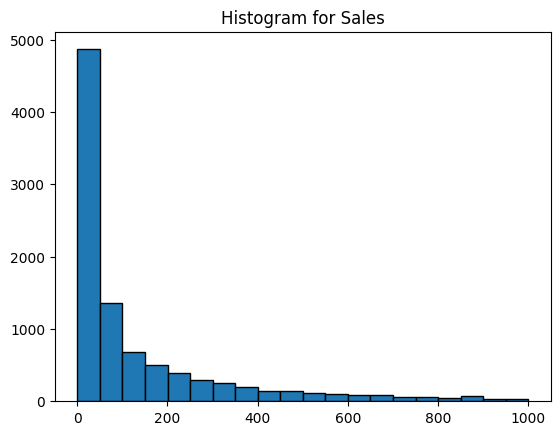

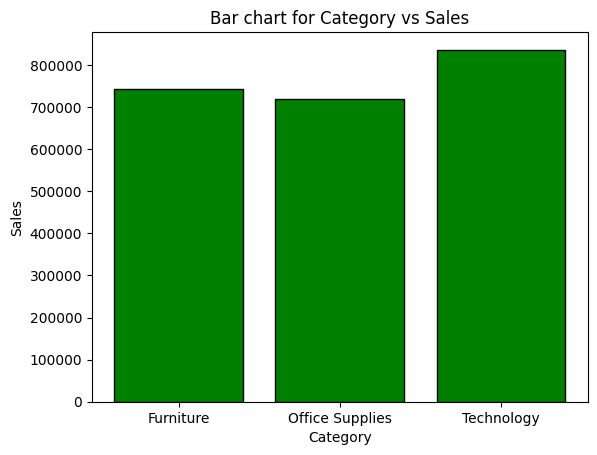

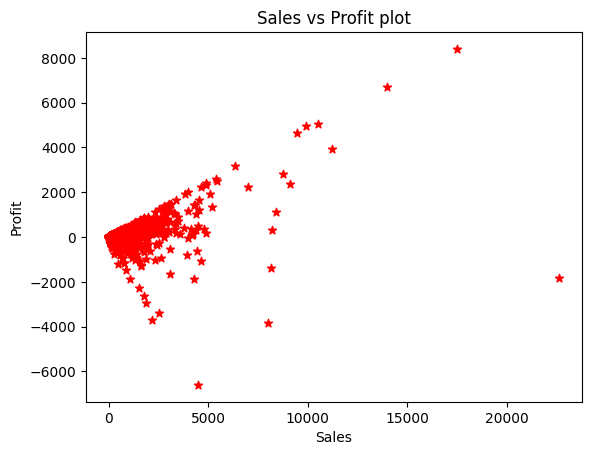

Higher sales does not imply higher profit


In [ ]:
#                       PART D
# 🎯 Goal: visualizing what we analyzed

# histogram
sales_arr=df[df['Sales']<1000]['Sales']
plt.hist(sales_arr,bins=20,edgecolor='black')
plt.title("Histogram for Sales")
plt.show()

# bar-chart
# we want to plot category vs sales
new_data=df.groupby('Category')[['Sales']].sum()
plt.bar(new_data.index,new_data['Sales'],color='green',edgecolor='black')
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Bar chart for Category vs Sales")
plt.show()

# scatter plot
sales_arr=df['Sales']
profit_arr=df['Profit']
plt.scatter(sales_arr,profit_arr,color='red',marker='*')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit plot")
plt.show()
print("Higher sales does not imply higher profit")